# 1. 下载并安装

In [4]:
!git clone https://github.com/huggingface/datasets.git 
!cd datasets && pip install -e .
!git clone https://github.com/huggingface/transformers
!cd transformers && pip install .

Cloning into 'datasets'...
remote: Enumerating objects: 38059, done.
remote: Counting objects: 100% (3359/3359), done.
remote: Compressing objects: 100% (1754/1754), done.
remote: Total 38059 (delta 1597), reused 2934 (delta 1320), pack-reused 34700
Receiving objects: 100% (38059/38059), 52.19 MiB | 24.55 MiB/s, done.
Resolving deltas: 100% (14853/14853), done.
Checking out files: 100% (6258/6258), done.
Obtaining file:///content/datasets
     |████████████████████████████████| 245kB 4.3MB/s 
     |████████████████████████████████| 112kB 34.2MB/s 
  Running setup.py develop for datasets
Cloning into 'transformers'...
remote: Enumerating objects: 72288, done.
remote: Counting objects: 100% (331/331), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 72288 (delta 156), reused 236 (delta 118), pack-reused 71957
Receiving objects: 100% (72288/72288), 55.11 MiB | 22.87 MiB/s, done.
Resolving deltas: 100% (51282/51282), done.
Processing /content/transformers
  Installing

# 2. 加载预训练模型
- 切词器：tokenizer
- 预训练模型：model

In [5]:
import os
os.environ['TRANSFORMERS_CACHE'] = 'model_files/'
from transformers import AutoModel, AutoTokenizer
import torch
import numpy as np
import torch.nn.functional as F

In [6]:
# download or load model
tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese')
model = AutoModel.from_pretrained('bert-base-chinese')

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## tokenizer

切词器重要的API

In [7]:
tokenizer # BertTokenizer

PreTrainedTokenizerFast(name_or_path='bert-base-chinese', vocab_size=21128, model_max_len=512, is_fast=True, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

### 【单句】或者【单句子对】编码，encode_plus

encode_plus会返回序列id，segment id和attention_mask，而encode只会返回序列id。

```encode_plus(text: Union[str, List[str], List[int]], text_pair: Optional[Union[str, List[str], List[int]]] = None, add_special_tokens: bool = True, padding: Union[bool, str, transformers.file_utils.PaddingStrategy] = False, truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy] = False, max_length: Optional[int] = None, stride: int = 0, is_split_into_words: bool = False, pad_to_multiple_of: Optional[int] = None, return_tensors: Optional[Union[str, transformers.file_utils.TensorType]] = None, return_token_type_ids: Optional[bool] = None, return_attention_mask: Optional[bool] = None, return_overflowing_tokens: bool = False, return_special_tokens_mask: bool = False, return_offsets_mapping: bool = False, return_length: bool = False, verbose: bool = True, **kwargs) → transformers.tokenization_utils_base.BatchEncoding```

In [67]:
tokenizer.encode_plus('春眠不觉晓',) # 单个句子

{'input_ids': [101, 3217, 4697, 679, 6230, 3236, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [68]:
tokenizer.encode_plus('春眠不觉晓', '处处闻啼鸟') # 句子对

{'input_ids': [101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [69]:
tokenizer.encode_plus(['春眠不觉晓', '处处闻啼鸟']) # 句子对,另一种写法

{'input_ids': [101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [70]:
tokenizer.encode_plus([['春眠不觉晓', '处处闻啼鸟'], ['生当作人杰', '死亦为鬼雄']]) # batch of 句子对,会报错，不支持

TypeError: ignored

### 【句子序列】或【句子对序列】编码，Batch Encode Plus

In [74]:
tokenizer.batch_encode_plus(['春眠不觉晓', '处处闻啼鸟']) # 句子序列，注意不会拼成句子对，和encode_plus有区别！！

{'input_ids': [[101, 3217, 4697, 679, 6230, 3236, 102], [101, 1905, 1905, 7319, 1582, 7881, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}

In [75]:
tokenizer.batch_encode_plus([['春眠不觉晓', '处处闻啼鸟'],]) # 句子对序列，每个句子对会拼成1个句子

{'input_ids': [[101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

### 完整编码：融合了encode_plus和batch_encode_plus

一般用这个就够了

重载了__call__, 返回值，先看下**API说明**：

```__call__(text: Union[str, List[str], List[List[str]]], text_pair: Optional[Union[str, List[str], List[List[str]]]] = None, add_special_tokens: bool = True, padding: Union[bool, str, transformers.file_utils.PaddingStrategy] = False, truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy] = False, max_length: Optional[int] = None, stride: int = 0, is_split_into_words: bool = False, pad_to_multiple_of: Optional[int] = None, return_tensors: Optional[Union[str, transformers.file_utils.TensorType]] = None, return_token_type_ids: Optional[bool] = None, return_attention_mask: Optional[bool] = None, return_overflowing_tokens: bool = False, return_special_tokens_mask: bool = False, return_offsets_mapping: bool = False, return_length: bool = False, verbose: bool = True, **kwargs) → transformers.tokenization_utils_base.BatchEncoding```

输入：
## - text：单个句子，或句子序列，或句子对序列


输出：
- 序列token ID：input_ids
- 序列分段ID: token_type_ids，例如：区分是同一个句子还是多个句子
- 序列掩码标识：attention_mask，0为mask，1为正常


In [11]:
# 单个句子，实际调用的是encode_plus
tokenizer('春眠不觉晓')

{'input_ids': [101, 3217, 4697, 679, 6230, 3236, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [76]:
# 单个句子对，实际调用的是encode_plus
tokenizer('春眠不觉晓', '处处闻啼鸟')

{'input_ids': [101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [77]:
# 句子序列，实际调用的是batch_encode_plus
tokenizer(['春眠不觉晓', '处处闻啼鸟'])

{'input_ids': [[101, 3217, 4697, 679, 6230, 3236, 102], [101, 1905, 1905, 7319, 1582, 7881, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}

In [78]:
# 句子对序列，每个句子对会被合并起来,并通过token_type_ids来区分是前一句还是后一句, 实际调用的是batch_encode_plus
tokenizer([['春眠不觉晓', '处处闻啼鸟'], ['纸上得来终觉浅', '绝知此事要躬行']],)

{'input_ids': [[101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102], [101, 5291, 677, 2533, 3341, 5303, 6230, 3840, 102, 5318, 4761, 3634, 752, 6206, 6717, 6121, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

### 其它细节接口

#### 分词：tokenize

(text: str, **kwargs) → List[str]

In [27]:
tokenizer.tokenize('春眠不觉晓')

['春', '眠', '不', '觉', '晓']

#### token序列编码: encode

输入是单个句子sentence，返回[CLS] [SEP] 修饰好的input_ids

```encode(text: Union[str, List[str], List[int]], text_pair: Optional[Union[str, List[str], List[int]]] = None, add_special_tokens: bool = True, padding: Union[bool, str, transformers.file_utils.PaddingStrategy] = False, truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy] = False, max_length: Optional[int] = None, stride: int = 0, return_tensors: Optional[Union[str, transformers.file_utils.TensorType]] = None, **kwargs) → List[int]```


In [42]:
encoded_input_ids = tokenizer.encode('春眠不觉晓', return_tensors='pt') # 返回pytorch tensor

In [52]:
input_ids = tokenizer.encode('春眠不觉晓',  add_special_tokens=True) # 默认list
input_ids

[101, 3217, 4697, 679, 6230, 3236, 102]

In [51]:
tokenizer.encode('春眠不觉晓', return_tensors='pt', add_special_tokens=False) # 不加特殊符号

tensor([[3217, 4697,  679, 6230, 3236]])

In [31]:
input_ids_1 = tokenizer.encode('春眠不觉晓', add_special_tokens=False) # 默认返回list
input_ids_1

[3217, 4697, 679, 6230, 3236]

In [32]:
input_ids_2 = tokenizer.encode('处处闻啼鸟', add_special_tokens=False) # 默认返回list
input_ids_2

[1905, 1905, 7319, 1582, 7881]

#### ID和tokens转换

In [33]:
# 101: [CLS],  102: [SEP]
tokenizer.convert_ids_to_tokens(['100', '101', '102'])

['[UNK]', '[CLS]', '[SEP]']

In [34]:
tokenizer.convert_tokens_to_ids(['春', '眠', '不', '觉', '晓'])

[3217, 4697, 679, 6230, 3236]

#### 句子ID pairs添加特殊字符，build_inputs_with_special_tokens

输入是两个句子的ID，输出是拼接好特殊符号的句子

In [35]:
tokenizer.build_inputs_with_special_tokens(
    input_ids_1, 
    input_ids_2)

[101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102]

#### 构造segment ids, create_token_type_ids_from_sequences

输入id序列pairs

输出segment id：包括了特殊字符

```(token_ids_0: List[int], token_ids_1: Optional[List[int]] = None) → List[int]```

In [36]:
tokenizer.create_token_type_ids_from_sequences(
    input_ids_1,
    input_ids_2)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

#### 输出特殊字符的mask序列

即：为特殊字符时，则为1

In [53]:
input_ids

[101, 3217, 4697, 679, 6230, 3236, 102]

In [58]:
tokenizer.get_special_tokens_mask(input_ids, already_has_special_tokens=True) # 首尾是特殊的

[1, 0, 0, 0, 0, 0, 1]

In [61]:
tokenizer.get_special_tokens_mask([3217, 4697, 679, 6230, 3236], already_has_special_tokens=True) # 首尾是特殊的

[0, 0, 0, 0, 0]

## model

In [8]:
model # BertModel

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(21128, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

# important APIs of tokenizer
- tokenize
- encode
- convert_ids_to_tokens
- convert_tokens_to_ids

## convert_ids_to_tokens

输入是id list，输出对应的原始tokens

In [ ]:
# 101: [CLS],  102: [SEP]
tokenizer.convert_ids_to_tokens(['100', '101', '102'])

['[UNK]', '[CLS]', '[SEP]']

## convert_ids_to_tokens

输入是token list，输出是对应的id

In [ ]:
tokenizer.convert_tokens_to_ids(['春', '眠', '不', '觉', '晓'])

[3217, 4697, 679, 6230, 3236]

## build_inputs_with_special_tokens

输入是两个句子的ID，输出是拼接好特殊符号的句子

Build model inputs from a sequence or a pair of sequence for sequence classification tasks by concatenating and adding special tokens. A BERT sequence has the following format:

single sequence: [CLS] X [SEP]

pair of sequences: [CLS] A [SEP] B [SEP]

In [ ]:
tokenizer.build_inputs_with_special_tokens(
    input_ids_1, 
    input_ids_2)

[101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102]

## create_token_type_ids_from_sequences

输出segment id：包括了特殊字符

(token_ids_0: List[int], token_ids_1: Optional[List[int]] = None) → List[int]

In [ ]:
tokenizer.create_token_type_ids_from_sequences(
    input_ids_1,
    input_ids_2)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

## get_special_tokens_mask

输出特殊字符的mask序列，即：为特殊字符时，则为1

In [ ]:
tokenizer.get_special_tokens_mask(input_ids_1, input_ids_2)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

## encode_plus
输出 input_ids， token_type_ids, attention_mask

encode_plus(text: Union[str, List[str], List[int]], text_pair: Optional[Union[str, List[str], List[int]]] = None, add_special_tokens: bool = True, padding: Union[bool, str, transformers.file_utils.PaddingStrategy] = False, truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy] = False, max_length: Optional[int] = None, stride: int = 0, is_split_into_words: bool = False, pad_to_multiple_of: Optional[int] = None, return_tensors: Optional[Union[str, transformers.file_utils.TensorType]] = None, return_token_type_ids: Optional[bool] = None, return_attention_mask: Optional[bool] = None, return_overflowing_tokens: bool = False, return_special_tokens_mask: bool = False, return_offsets_mapping: bool = False, return_length: bool = False, verbose: bool = True, **kwargs) → transformers.tokenization_utils_base.BatchEncoding

In [62]:
tokenizer.encode_plus('春眠不觉晓',) # 单个句子

{'input_ids': [101, 3217, 4697, 679, 6230, 3236, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [66]:
tokenizer.encode_plus(['春眠不觉晓', '处处闻啼鸟']) # 两个句子

TypeError: ignored

In [ ]:
tokenizer.encode_plus('生当作人杰', '死亦为鬼雄') # 两个句子

{'input_ids': [101, 4495, 2496, 868, 782, 3345, 102, 3647, 771, 711, 7787, 7413, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

## batch_encode_plus

batch_encode_plus(batch_text_or_text_pairs: Union[List[str], List[Tuple[str, str]], List[List[str]], List[Tuple[List[str], List[str]]], List[List[int]], List[Tuple[List[int], List[int]]]], add_special_tokens: bool = True, padding: Union[bool, str, transformers.file_utils.PaddingStrategy] = False, truncation: Union[bool, str, transformers.tokenization_utils_base.TruncationStrategy] = False, max_length: Optional[int] = None, stride: int = 0, is_split_into_words: bool = False, pad_to_multiple_of: Optional[int] = None, return_tensors: Optional[Union[str, transformers.file_utils.TensorType]] = None, return_token_type_ids: Optional[bool] = None, return_attention_mask: Optional[bool] = None, return_overflowing_tokens: bool = False, return_special_tokens_mask: bool = False, return_offsets_mapping: bool = False, return_length: bool = False, verbose: bool = True, **kwargs) → transformers.tokenization_utils_base.BatchEncoding

In [ ]:
tokenizer.batch_encode_plus(['春眠不觉晓'])

{'input_ids': [[101, 3217, 4697, 679, 6230, 3236, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
tokenizer.batch_encode_plus([['春眠不觉晓','处处闻啼鸟'],  ['生当作人杰', '死亦为鬼雄']])

{'input_ids': [[101, 3217, 4697, 679, 6230, 3236, 102, 1905, 1905, 7319, 1582, 7881, 102], [101, 4495, 2496, 868, 782, 3345, 102, 3647, 771, 711, 7787, 7413, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

# BertModel

In [ ]:
with torch.no_grad():
    res = model(input_ids)

In [ ]:
input_ids

tensor([[ 101, 3217, 4697,  679, 6230, 3236,  102]])

In [ ]:
# sequence_output, pooled_output
res[0].shape, res[1].shape # 包括了CLS和SEP的向量

(torch.Size([1, 7, 768]), torch.Size([1, 768]))

In [ ]:
def setence_embedding(sentences, is_norm=True):
    sample_dict = tokenizer(sentences, return_tensors='pt', padding=True)
    
    with torch.no_grad():
        sample_output = model(**sample_dict)
    
    # (B, 7, 768)
    token_embeddings = sample_output[0]  # First element of model_output contains all token embeddings
    
    attention_mask = sample_dict['attention_mask'] # (1, 7)
    
    # (B, 7, 1)
    input_mask_expanded = attention_mask.unsqueeze(-1) # .expand(token_embeddings.size()).float()
    
    # (B, 7, 768) => (B, 768)
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, axis=1)
    
    # (B, 768) /  (B, )
    sum_mask = torch.clamp(input_mask_expanded.sum(axis=1), min=1e-9)
    
    # (B, 768)
    mean_embeddings = sum_embeddings / sum_mask
    
    if is_norm:
        mean_embeddings = F.normalize(mean_embeddings, p=2, dim=1)
    
    return mean_embeddings

In [ ]:
sentences = ['春眠不觉晓', '处处闻啼鸟', '生当作人杰', '死亦为鬼雄']
sentences = ['春眠不觉晓','大梦谁先觉','浓睡不消残酒','东临碣石以观沧海']

In [ ]:
norm_sent_embeds = setence_embedding(sentences)

In [ ]:
m = norm_sent_embeds.numpy()

In [ ]:
sim_matrix = np.around(np.dot(m, m.T), decimals=3)

In [ ]:
sim_matrix

array([[1.   , 0.754, 0.833, 0.57 ],
       [0.754, 1.   , 0.723, 0.505],
       [0.833, 0.723, 1.   , 0.585],
       [0.57 , 0.505, 0.585, 1.   ]], dtype=float32)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
font_path="/System/Library/fonts/PingFang.ttc"

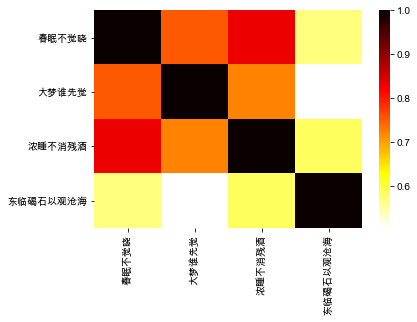

In [ ]:
sns.heatmap(sim_matrix, cmap="hot_r",
                 xticklabels=sentences, yticklabels=sentences)  # 去除纵、横轴 label
plt.show()